<a href="https://colab.research.google.com/github/HaidyMohamedAnter/Ai-Platforms-fashion_mnist_classification_tf_keras/blob/main/Aiplatforms_Assignment3_2305309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name:Haidy Mohamed Anter
#id:2305309

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#LoadData&PreProcess
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#BuildMyModel
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#CompilingMymodel
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#TrainModel
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
844/844 - 5s - 6ms/step - accuracy: 0.8238 - loss: 0.4945 - val_accuracy: 0.8415 - val_loss: 0.4294
Epoch 2/10
844/844 - 2s - 2ms/step - accuracy: 0.8679 - loss: 0.3622 - val_accuracy: 0.8722 - val_loss: 0.3650
Epoch 3/10
844/844 - 2s - 2ms/step - accuracy: 0.8795 - loss: 0.3282 - val_accuracy: 0.8798 - val_loss: 0.3412
Epoch 4/10
844/844 - 3s - 3ms/step - accuracy: 0.8886 - loss: 0.3017 - val_accuracy: 0.8713 - val_loss: 0.3489
Epoch 5/10
844/844 - 2s - 2ms/step - accuracy: 0.8952 - loss: 0.2808 - val_accuracy: 0.8825 - val_loss: 0.3336
Epoch 6/10
844/844 - 2s - 2ms/step - accuracy: 0.8998 - loss: 0.2659 - val_accuracy: 0.8878 - val_loss: 0.3151
Epoch 7/10
844/844 - 2s - 2ms/step - accuracy: 0.9031 - loss: 0.2566 - val_accuracy: 0.8865 - val_loss: 0.3138
Epoch 8/10
844/844 - 2s - 2ms/step - accuracy: 0.9074 - loss: 0.2449 - val_accuracy: 0.8933 - val_loss: 0.3007
Epoch 9/10
844/844 - 2s - 3ms/step - accuracy: 0.9108 - loss: 0.2346 - val_accuracy: 0.8892 - val_loss: 0.3131
E

In [ ]:
#EvaluateModel
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.8864 - loss: 0.3408
Test accuracy: 88.64%


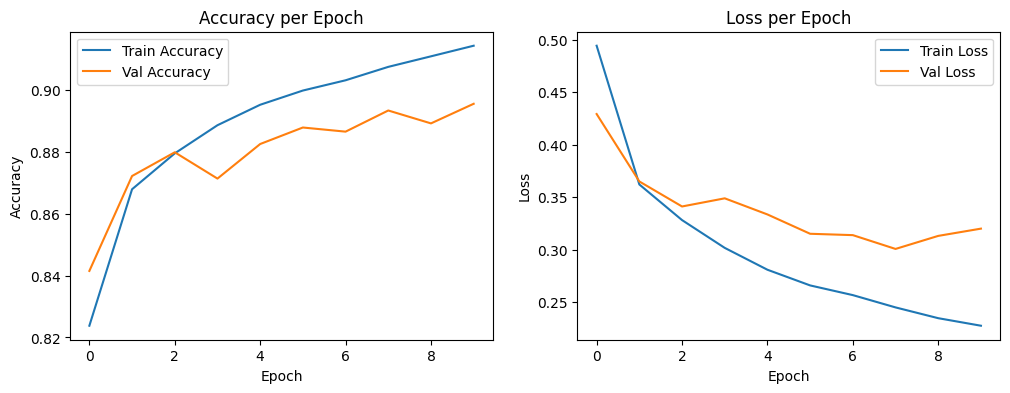

In [ ]:
#PlotsOfTraining
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#______AnotherOne___Showing THE Loss Per epoch____
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


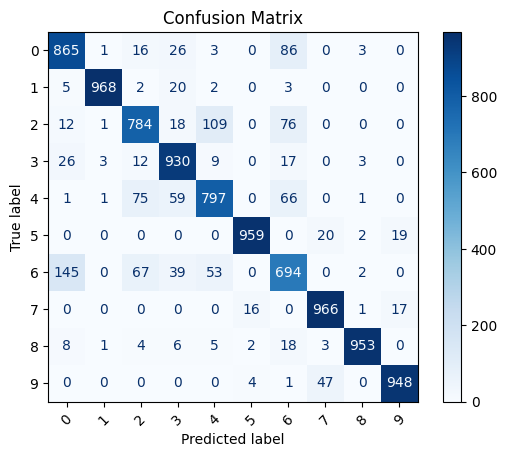

In [ ]:
#ConfusionMatrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#TestPredictions
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


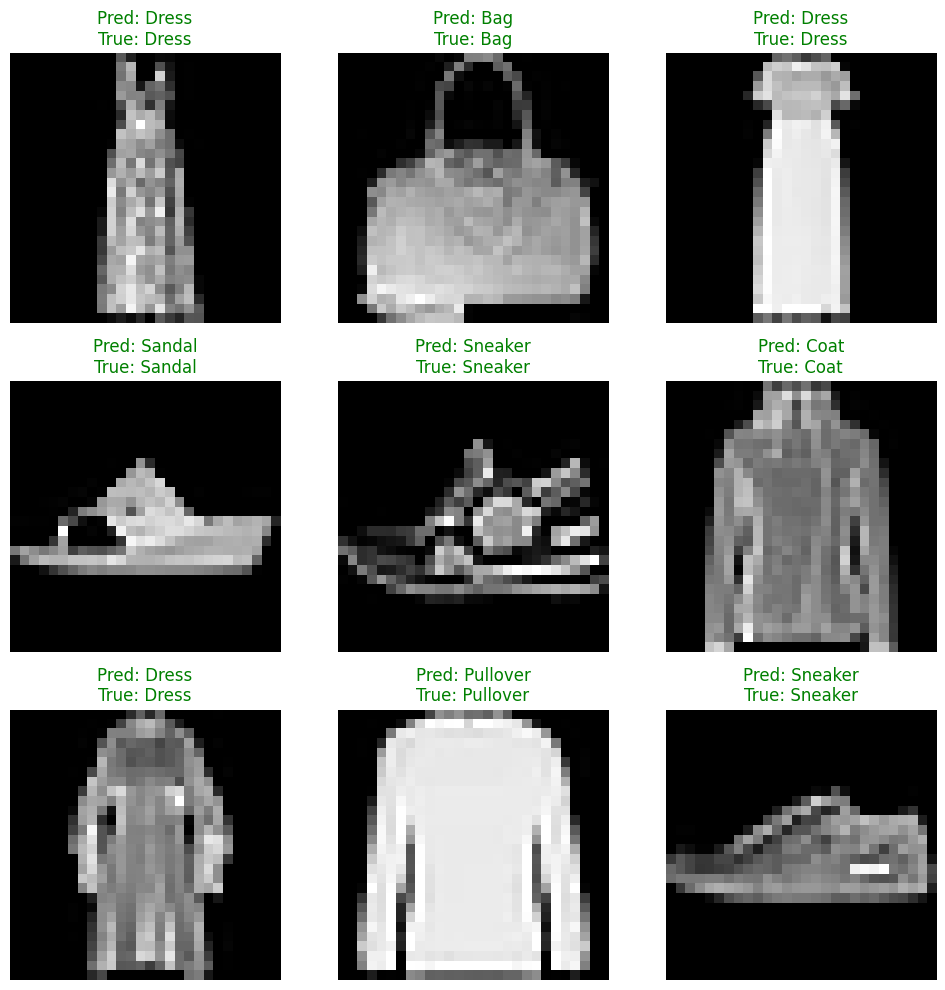

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    pred = np.argmax(model.predict(x_test[idx].reshape(1, 28, 28)), axis=1)[0]
    color = 'green' if pred == y_test[idx] else 'red'
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#QuickSummaryForResults
print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"Final Test Accuracy: {test_acc*100:.2f}%")

Final Training Accuracy: 91.43%
Final Validation Accuracy: 89.55%
Final Test Accuracy: 88.64%
